### PCA
Principal Components Analysis
El objetivo principal de PCA es reducir la dimensionalidad. Que es la dimensionalidad y como lo hace?.

Sea la variable X^* una representacion de los datos en una menor dimension. El Objetivo es que si reconstruimos los datos al espacio original se pierda la menor cantidad de informacion.

Los datos se deben centrar antes de realizar cualquier projeccion.

$Y_{n,k} = (X_{n,d}-\mu_d) . W_{d,k}$


$X^*_{n,d} = Y_{n,k}.W^{-1}_{k,d}$


Como $W^{-1}_{k,d}$ es ortonormal, la inversa es la transpuesta $W^{-1}_{k,d}= W^T$.


$Min (X-X^*)^2$ , $W^T.W=I$

$=((X-\mu) - Y_{n,k}.W^{-1}_{k,d} )^2$ 


$=((X-\mu) - (X_{n,d}-\mu)W_{d,k}W^{-1}_{k,d})^2$ 
 
 
 Sin embargo, minimizar el error, es similar a maximizar 

$S = W^T \Sigma W$

$S=\sum_{i=1}^D{(X-\mu)(X-\mu)}^T$

$X_{n,d}- X_{n,k}^* = \sum_{i=1}^D{ W_i^T \Sigma W_i} - \sum_{i=1}^K{ W_i^T \Sigma W_i}$

Para reducir el error, las varianzas de los primeros k elementos van a ser mas grandes.

$det(A-\lambda)=0$

$m = [[1 2 4]
      [3 5 6]
      [1 0 2]]$

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### 1 PCA

In [12]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import tarfile
import zipfile
from scipy.io import loadmat
from urllib.request import urlretrieve
from os.path import isfile, isdir
import seaborn as sns; sns.set()
%matplotlib inline

from scipy.io import loadmat
import glob
import random
import matplotlib.image as img
#Install pillow
from PIL import Image

In [2]:
d_name = 'data/faces/rawdata'
sample = 0.2
X = []
for nfile in  os.listdir(d_name):
    if random.random() <= sample:
        bytes_read = open(os.path.join(d_name,nfile), "rb").read()
        img = Image.frombytes('L', (128,128), bytes_read)
        X.append(np.array(img).flatten())

X = np.array(X)

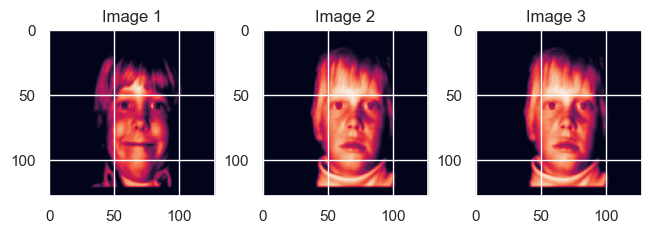

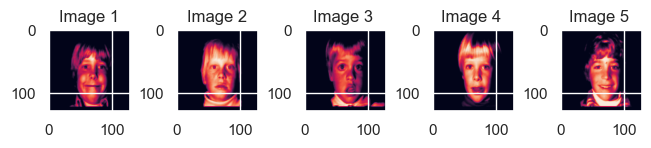

In [5]:
def plot_1_images(data, label="Image 1", ax=None):
    fn_shape = lambda X: X.reshape(128,128)
    fig = None
    if ax is None:
        fig, ax = plt.subplots(1,1, constrained_layout=True)
    ax.imshow(fn_shape(data))
    ax.set_title(label=label)
    return fig,ax

def plot_3_images(data,ix_1, ix_2 , ix_3):
    fn_shape = lambda X: X.reshape(128,128)
    fig, ax = plt.subplots(1,3, constrained_layout=True)
    ax[0].imshow(fn_shape(data[ix_1]))
    ax[0].set_title(label="Image %s"% ix_1)
    ax[1].imshow(fn_shape(data[ix_2]))
    ax[1].set_title(label="Image %s"% ix_2)
    ax[2].imshow(fn_shape(data[ix_2]))
    ax[2].set_title(label="Image %s "% ix_3)
    plt.show()
plot_3_images(X,1, 2 , 3)

def plot_5_images(data,ix_1, ix_2 , ix_3,ix_4,ix_5):
    fn_shape = lambda X: X.reshape(128,128)
    fig, ax = plt.subplots(1,5, constrained_layout=True)
    ax[0].imshow(fn_shape(data[ix_1]))
    ax[0].set_title(label="Image %s"% ix_1)
    ax[1].imshow(fn_shape(data[ix_2]))
    ax[1].set_title(label="Image %s"% ix_2)
    ax[2].imshow(fn_shape(data[ix_3]))
    ax[2].set_title(label="Image %s "% ix_3)
    ax[3].imshow(fn_shape(data[ix_4]))
    ax[3].set_title(label="Image %s "% ix_4)
    ax[4].imshow(fn_shape(data[ix_5]))
    ax[4].set_title(label="Image %s "% ix_5)
    plt.show()

plot_5_images(X,1,2,3,4,5)

### Paso 1, Quitar la media de los datos.

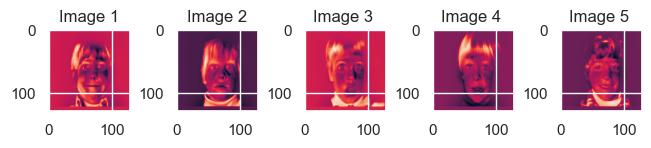

In [6]:
X_mean = X.mean(axis=0)
X_center = X - X_mean
plot_5_images(X_center,1, 2 ,3,4,5)

(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'Image 1'}>)

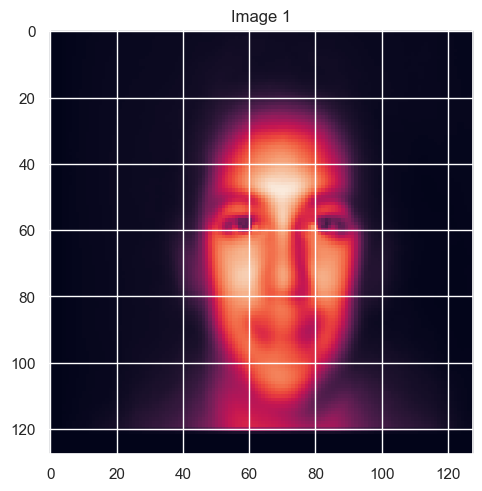

In [10]:
plot_1_images(X_mean)

### 1.2

### Centrar los datos faces

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=200)
X_reduced = pca.fit_transform(X_center)


eigen_values = pca.explained_variance_
eigen_faces = pca.components_

### ¿Cuantos componentes se deben utilizar para mantener el 90% de las caracteristicas?

### Para mantener el 90% de las carateristicas se nesecitan un 180 de las componente, esto se debe a que las eigenfaces se generan a partir de un conjunto de imágenes de caras y cada eigenface captura una dirección de variabilidad en estas imágenes. Por lo tanto, al utilizar 180 eigenfaces, estás utilizando los primeros 180 componentes principales que explican la mayor parte de la variabilidad en las imágenes de caras, y por lo tanto, estás manteniendo el 90% de las características en las imágenes originales.

### Cara original 1

(None, <Axes: title={'center': 'Con 99 porciento eigenfaces'}>)

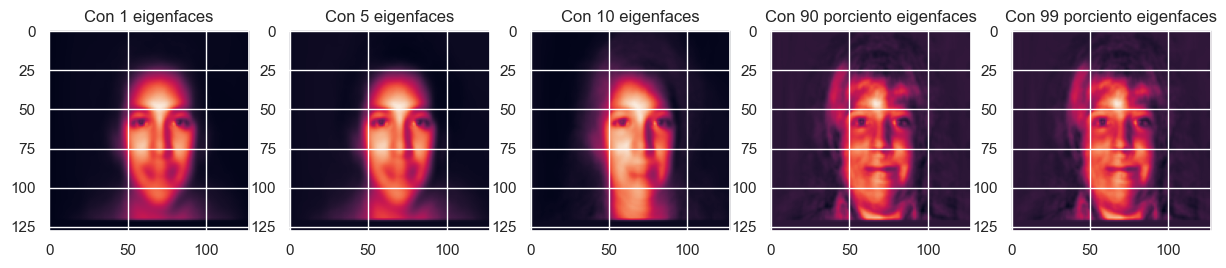

In [14]:
face_1 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:1], eigen_faces[:1,:]), axis=0)
face_5 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:5],  eigen_faces[:5,:]), axis=0)
face_10 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:10],  eigen_faces[:10,:]), axis=0)
face_90 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:180], eigen_faces[:180,:]),  axis=0)
face_99 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:198], eigen_faces[:198,:]),  axis=0)

fig, ax = plt.subplots(1,5,figsize=(15,15))



plot_1_images(face_1,ax=ax[0],label="Con 1 eigenfaces")
plot_1_images(face_5,ax=ax[1],label="Con 5 eigenfaces")
plot_1_images(face_10,ax=ax[2],label="Con 10 eigenfaces")
plot_1_images(face_90,ax=ax[3],label="Con 90 porciento eigenfaces")
plot_1_images(face_90,ax=ax[4],label="Con 99 porciento eigenfaces")

### Cara original 2

(None, <Axes: title={'center': 'Con 99 porciento eigenfaces'}>)

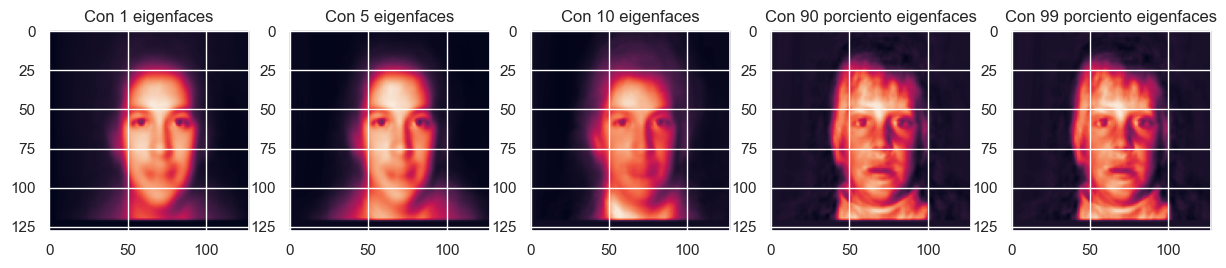

In [15]:
face_1 = X_mean + np.sum(np.dot(X_reduced[2].reshape(1,-1)[:,:1], eigen_faces[:1,:]), axis=0)
face_5 = X_mean + np.sum(np.dot(X_reduced[2].reshape(1,-1)[:,:5],  eigen_faces[:5,:]), axis=0)
face_10 = X_mean + np.sum(np.dot(X_reduced[2].reshape(1,-1)[:,:10],  eigen_faces[:10,:]), axis=0)
face_90 = X_mean + np.sum(np.dot(X_reduced[2].reshape(1,-1)[:,:180], eigen_faces[:180,:]),  axis=0)
face_99 = X_mean + np.sum(np.dot(X_reduced[2].reshape(1,-1)[:,:198], eigen_faces[:198,:]),  axis=0)

fig, ax = plt.subplots(1,5,figsize=(15,15))



plot_1_images(face_1,ax=ax[0],label="Con 1 eigenfaces")
plot_1_images(face_5,ax=ax[1],label="Con 5 eigenfaces")
plot_1_images(face_10,ax=ax[2],label="Con 10 eigenfaces")
plot_1_images(face_90,ax=ax[3],label="Con 90 porciento eigenfaces")
plot_1_images(face_90,ax=ax[4],label="Con 99 porciento eigenfaces")

### cara original 3

(None, <Axes: title={'center': 'Con 99 porciento eigenfaces'}>)

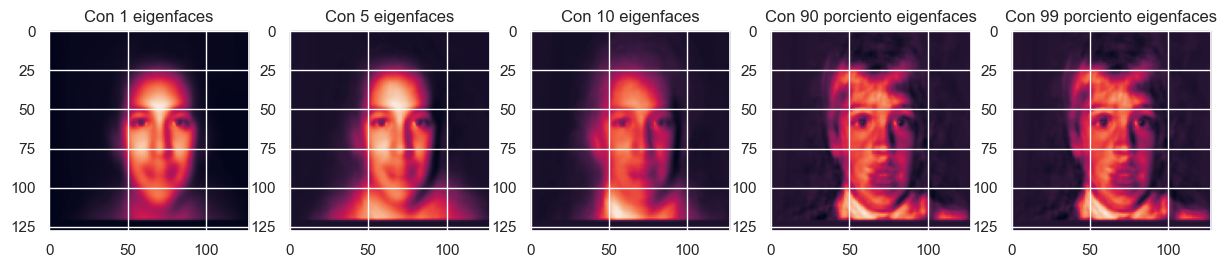

In [18]:
face_1 = X_mean + np.sum(np.dot(X_reduced[3].reshape(1,-1)[:,:1], eigen_faces[:1,:]), axis=0)
face_5 = X_mean + np.sum(np.dot(X_reduced[3].reshape(1,-1)[:,:5],  eigen_faces[:5,:]), axis=0)
face_10 = X_mean + np.sum(np.dot(X_reduced[3].reshape(1,-1)[:,:10],  eigen_faces[:10,:]), axis=0)
face_90 = X_mean + np.sum(np.dot(X_reduced[3].reshape(1,-1)[:,:180], eigen_faces[:180,:]),  axis=0)
face_99 = X_mean + np.sum(np.dot(X_reduced[3].reshape(1,-1)[:,:198], eigen_faces[:198,:]),  axis=0)

fig, ax = plt.subplots(1,5,figsize=(15,15))



plot_1_images(face_1,ax=ax[0],label="Con 1 eigenfaces")
plot_1_images(face_5,ax=ax[1],label="Con 5 eigenfaces")
plot_1_images(face_10,ax=ax[2],label="Con 10 eigenfaces")
plot_1_images(face_90,ax=ax[3],label="Con 90 porciento eigenfaces")
plot_1_images(face_90,ax=ax[4],label="Con 99 porciento eigenfaces")

### cara original 4

(None, <Axes: title={'center': 'Con 99 porciento eigenfaces'}>)

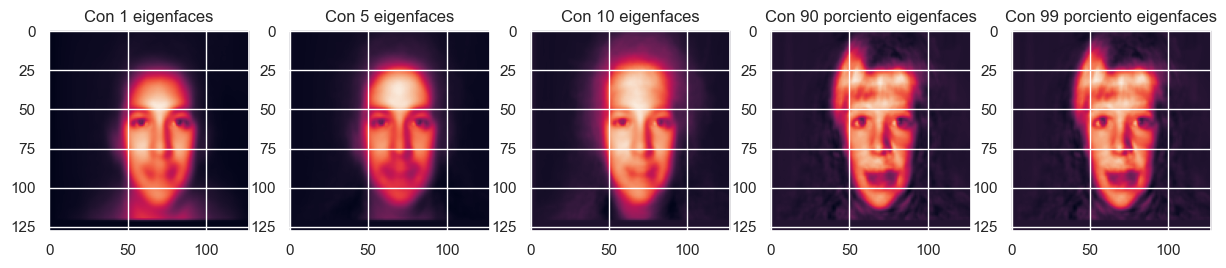

In [19]:
face_1 = X_mean + np.sum(np.dot(X_reduced[4].reshape(1,-1)[:,:1], eigen_faces[:1,:]), axis=0)
face_5 = X_mean + np.sum(np.dot(X_reduced[4].reshape(1,-1)[:,:5],  eigen_faces[:5,:]), axis=0)
face_10 = X_mean + np.sum(np.dot(X_reduced[4].reshape(1,-1)[:,:10],  eigen_faces[:10,:]), axis=0)
face_90 = X_mean + np.sum(np.dot(X_reduced[4].reshape(1,-1)[:,:180], eigen_faces[:180,:]),  axis=0)
face_99 = X_mean + np.sum(np.dot(X_reduced[4].reshape(1,-1)[:,:198], eigen_faces[:198,:]),  axis=0)

fig, ax = plt.subplots(1,5,figsize=(15,15))



plot_1_images(face_1,ax=ax[0],label="Con 1 eigenfaces")
plot_1_images(face_5,ax=ax[1],label="Con 5 eigenfaces")
plot_1_images(face_10,ax=ax[2],label="Con 10 eigenfaces")
plot_1_images(face_90,ax=ax[3],label="Con 90 porciento eigenfaces")
plot_1_images(face_90,ax=ax[4],label="Con 99 porciento eigenfaces")

### cara original 5

(None, <Axes: title={'center': 'Con 99 porciento eigenfaces'}>)

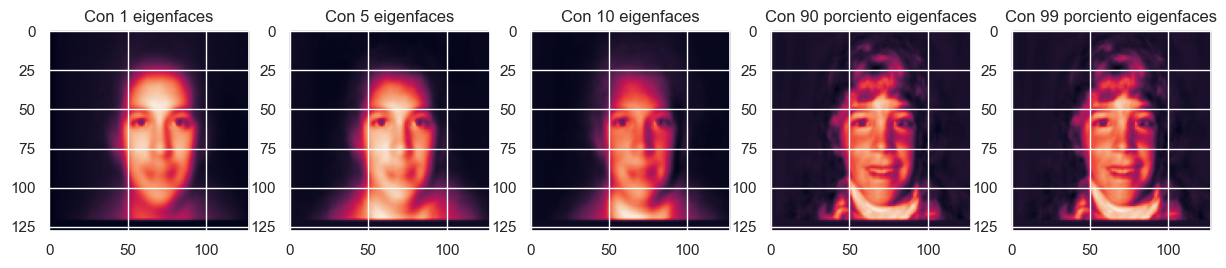

In [20]:
face_1 = X_mean + np.sum(np.dot(X_reduced[5].reshape(1,-1)[:,:1], eigen_faces[:1,:]), axis=0)
face_5 = X_mean + np.sum(np.dot(X_reduced[5].reshape(1,-1)[:,:5],  eigen_faces[:5,:]), axis=0)
face_10 = X_mean + np.sum(np.dot(X_reduced[5].reshape(1,-1)[:,:10],  eigen_faces[:10,:]), axis=0)
face_90 = X_mean + np.sum(np.dot(X_reduced[5].reshape(1,-1)[:,:180], eigen_faces[:180,:]),  axis=0)
face_99 = X_mean + np.sum(np.dot(X_reduced[5].reshape(1,-1)[:,:198], eigen_faces[:198,:]),  axis=0)

fig, ax = plt.subplots(1,5,figsize=(15,15))



plot_1_images(face_1,ax=ax[0],label="Con 1 eigenfaces")
plot_1_images(face_5,ax=ax[1],label="Con 5 eigenfaces")
plot_1_images(face_10,ax=ax[2],label="Con 10 eigenfaces")
plot_1_images(face_90,ax=ax[3],label="Con 90 porciento eigenfaces")
plot_1_images(face_90,ax=ax[4],label="Con 99 porciento eigenfaces")

### ¿Que se puede concluir de los resultados?

Algunas concluciones a las que podemos llegar 

1 - Respecto a la reconstrucción de caras, se puede observar que comienza en el centro de la imagen y se extiende hacia afuera. Esto se debe a que las partes más importantes y relevantes de la cara, como los ojos y la boca, suelen estar en el centro, mientras que los bordes contienen detalles menos importantes.
2 -Se puede observar que el 90% o incluso el 99% de la información de los datos puede ser explicada por las primeras componentes principales.
3 - Al utilizar la "mean face" se puede reconstruir la información con un grado razonable de precisión, siempre y cuando se utilicen al menos el 80% de las componentes.
